Hedef          0
Silindirler    0
Hacim          0
Güç            0
Ağırlık        0
Hızlanma       0
Model Yılı     0
Menşe          0
dtype: int64
Hedef          0
Silindirler    0
Hacim          0
Güç            0
Ağırlık        0
Hızlanma       0
Model Yılı     0
Menşe          0
dtype: int64


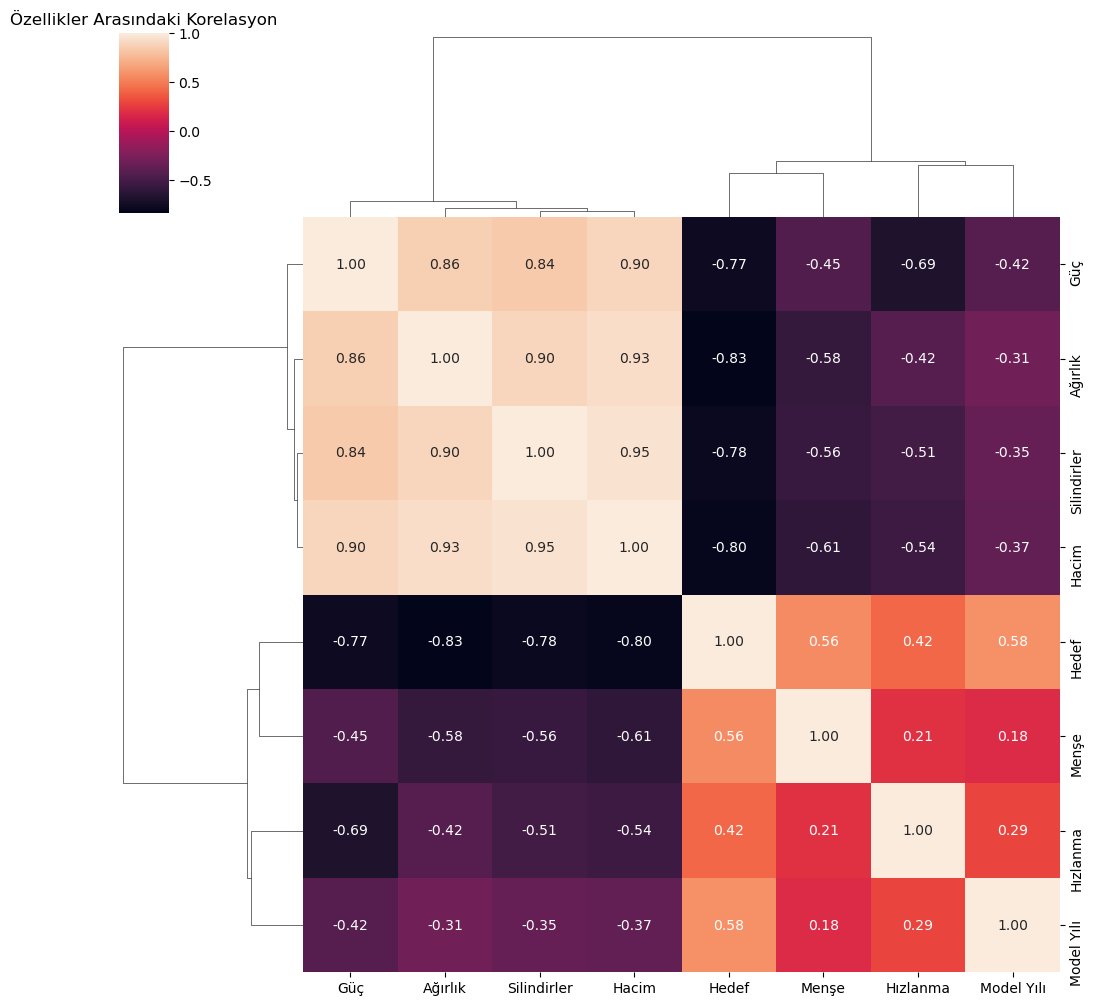

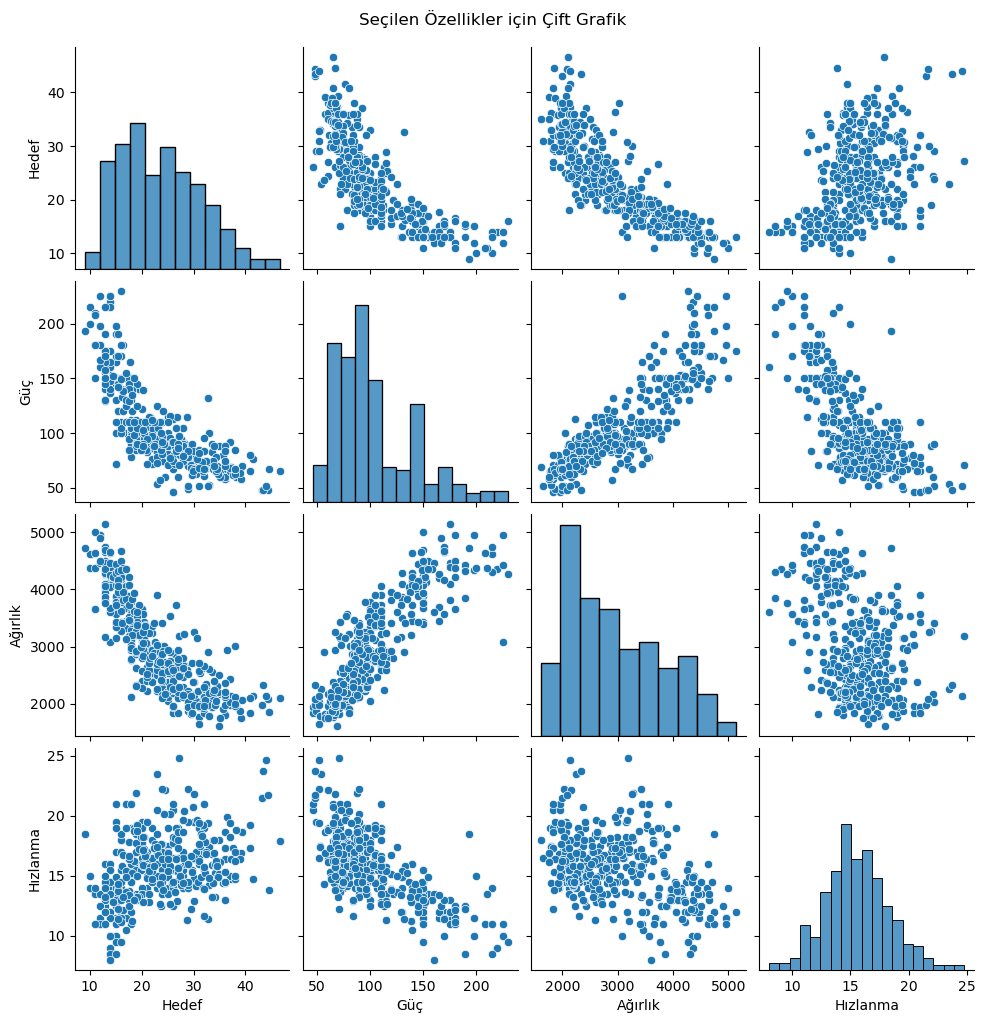

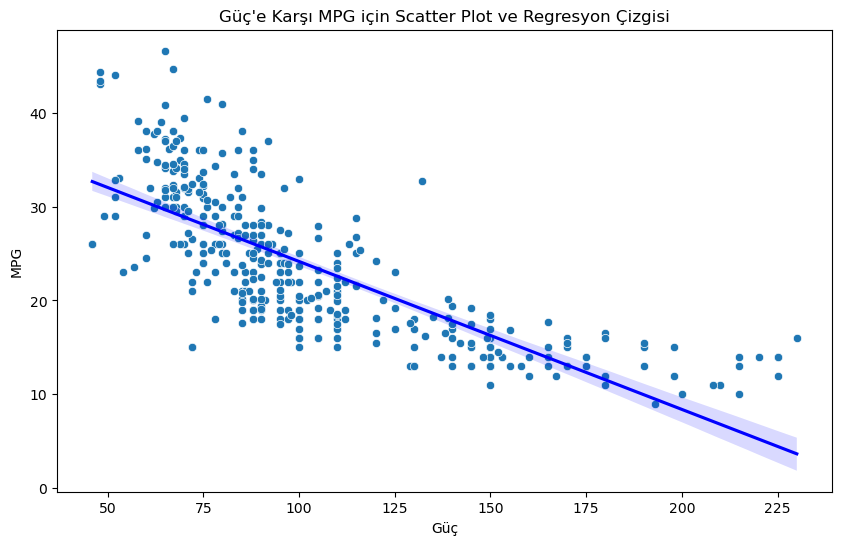

Lineer Model:
Model MSE: 6.361723057233485
Model RMSE: 2.522245637766767
Ridge Model:
Model MSE: 6.333357546572163
Model RMSE: 2.51661628910173
Lasso Model:
Model MSE: 6.32610961501979
Model RMSE: 2.5151758616486024
ElasticNet Model:
Model MSE: 6.455947999266414
Model RMSE: 2.5408557612084977
Random Forest Model:
Model MSE: 4.323695137500003
Model RMSE: 2.0793496910091873
Gradient Boosting Model:
Model MSE: 5.844976286965927
Model RMSE: 2.4176385765796193
Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBoost Model:
Model MSE: 6.013175720632239
Model RMSE: 2.4521777506192812


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

class VeriIsleyici:
    def __init__(self, dosya_yolu):
        self.dosya_yolu = dosya_yolu

    def veriyi_yukle(self):
        sutun_isimleri = ["MPG", "Silindirler", "Hacim", "Güç", "Ağırlık", "Hızlanma", "Model Yılı", "Menşe"]
        veri = pd.read_csv(self.dosya_yolu, names=sutun_isimleri, na_values="?", comment="\t", sep=" ", skipinitialspace=True)
        veri = veri.rename(columns={"MPG": "Hedef"})
        return veri

    def eksik_degerleri(self, veri):
        print(veri.isna().sum())
        veri["Güç"] = veri["Güç"].fillna(veri["Güç"].mean())
        print(veri.isna().sum())
        return veri

    def veriyi_incele(self, veri):
        corr_matrix = veri.corr()
        sns.clustermap(corr_matrix, annot=True, fmt=".2f")
        plt.title("Özellikler Arasındaki Korelasyon")
        plt.show()

        sns.pairplot(veri, vars=["Hedef", "Güç", "Ağırlık", "Hızlanma"])
        plt.suptitle("Seçilen Özellikler için Çift Grafik", y=1.02)
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=veri["Güç"], y=veri["Hedef"])
        sns.regplot(x=veri["Güç"], y=veri["Hedef"], scatter=False, color='red', line_kws={'color': 'blue'})
        plt.title("Güç'e Karşı MPG için Scatter Plot ve Regresyon Çizgisi")
        plt.xlabel("Güç")
        plt.ylabel("MPG")
        plt.show()

class OzellikMuhendisi:
    def yeni_ozellik_olustur(self, veri):
        veri["Hacim_Ağırlık_Oranı"] = veri["Hacim"] / veri["Ağırlık"]
        return veri

    def kategorik_ozellikleri_onehot_encode_et(self, veri):
        veri = pd.get_dummies(veri, columns=["Silindirler", "Menşe"], drop_first=True)
        return veri

class ModelEgitici:
    def egit_lineer_model(self, X_egitim, Y_egitim):
        lr = LinearRegression()
        lr.fit(X_egitim, Y_egitim)
        return lr

    def egit_ridge_model(self, X_egitim, Y_egitim, alphas):
        ridge = Ridge(random_state=42, max_iter=10000)
        tuned_parameters = [{'alpha': alphas}]
        clf = GridSearchCV(ridge, tuned_parameters, cv=5, scoring="neg_mean_squared_error", refit=True)
        clf.fit(X_egitim, Y_egitim)
        return clf.best_estimator_

    def egit_lasso_model(self, X_egitim, Y_egitim, alphas):
        lasso = Lasso(random_state=42, max_iter=10000)
        tuned_parameters = [{'alpha': alphas}]
        clf = GridSearchCV(lasso, tuned_parameters, cv=5, scoring="neg_mean_squared_error", refit=True)
        clf.fit(X_egitim, Y_egitim)
        return clf.best_estimator_

    def egit_elasticnet_model(self, X_egitim, Y_egitim, alphas):
        elasticnet = ElasticNet(random_state=42, max_iter=10000)
        parameters_grid = {"alpha": alphas, "l1_ratio": np.arange(0.0, 1.0, 0.05)}
        clf = GridSearchCV(elasticnet, parameters_grid, cv=5, scoring="neg_mean_squared_error", refit=True)
        clf.fit(X_egitim, Y_egitim)
        return clf.best_estimator_

    def egit_random_forest_model(self, X_egitim, Y_egitim):
        random_forest = RandomForestRegressor(random_state=42)
        random_forest.fit(X_egitim, Y_egitim)
        return random_forest

    def egit_gradient_boosting_model(self, X_egitim, Y_egitim):
        gradient_boosting = GradientBoostingRegressor(random_state=42)
        gradient_boosting.fit(X_egitim, Y_egitim)
        return gradient_boosting

    def egit_xgboost_model(self, X_egitim, Y_egitim):
        parameters_grid = {'nthread': [4],
                           'objective': ['reg:squarederror'],
                           'learning_rate': [0.03, 0.05, 0.07],
                           'max_depth': [5, 6, 7],
                           'min_child_weight': [4],
                           'verbosity': [1],
                           'subsample': [0.7],
                           'colsample_bytree': [0.7],
                           'n_estimators': [500, 1000]}

        model_xgb = xgb.XGBRegressor()
        clf = GridSearchCV(model_xgb, parameters_grid, cv=5, scoring='neg_mean_squared_error', refit=True, n_jobs=5, verbose=True)
        clf.fit(X_egitim, Y_egitim)
        return clf.best_estimator_

class ModelDegerlendirici:
    def tahminleri_gorselle(self, model, X_test, Y_test):
        tahmin_degerleri = model.predict(X_test)
        mse = mean_squared_error(Y_test, tahmin_degerleri)
        rmse = np.sqrt(mse)
        print(f"Model MSE: {mse}")
        print(f"Model RMSE: {rmse}")

def ana_program():
    dosya_yolu = "Araç_Yakıt_Tüketim.data"

    veri_isleyici = VeriIsleyici(dosya_yolu)
    veri = veri_isleyici.veriyi_yukle()
    veri = veri_isleyici.eksik_degerleri(veri)
    veri_isleyici.veriyi_incele(veri)

    ozellik_muhendisi = OzellikMuhendisi()
    veri = ozellik_muhendisi.yeni_ozellik_olustur(veri)
    veri = ozellik_muhendisi.kategorik_ozellikleri_onehot_encode_et(veri)

    model_egitici = ModelEgitici()
    model_degerlendirici = ModelDegerlendirici()

    X_egitim, X_test, Y_egitim, Y_test = train_test_split(veri.drop(["Hedef"], axis=1), veri["Hedef"], test_size=0.2, random_state=42)

    lineer_model = model_egitici.egit_lineer_model(X_egitim, Y_egitim)
    print("Lineer Model:")
    model_degerlendirici.tahminleri_gorselle(lineer_model, X_test, Y_test)

    alphas = np.logspace(-4, -0.5, 30)
    ridge_model = model_egitici.egit_ridge_model(X_egitim, Y_egitim, alphas)
    print("Ridge Model:")
    model_degerlendirici.tahminleri_gorselle(ridge_model, X_test, Y_test)

    lasso_model = model_egitici.egit_lasso_model(X_egitim, Y_egitim, alphas)
    print("Lasso Model:")
    model_degerlendirici.tahminleri_gorselle(lasso_model, X_test, Y_test)

    elasticnet_model = model_egitici.egit_elasticnet_model(X_egitim, Y_egitim, alphas)
    print("ElasticNet Model:")
    model_degerlendirici.tahminleri_gorselle(elasticnet_model, X_test, Y_test)

    random_forest_model = model_egitici.egit_random_forest_model(X_egitim, Y_egitim)
    print("Random Forest Model:")
    model_degerlendirici.tahminleri_gorselle(random_forest_model, X_test, Y_test)

    gradient_boosting_model = model_egitici.egit_gradient_boosting_model(X_egitim, Y_egitim)
    print("Gradient Boosting Model:")
    model_degerlendirici.tahminleri_gorselle(gradient_boosting_model, X_test, Y_test)

    xgboost_model = model_egitici.egit_xgboost_model(X_egitim, Y_egitim)
    print("XGBoost Model:")
    model_degerlendirici.tahminleri_gorselle(xgboost_model, X_test, Y_test)

if __name__ == "__main__":
    ana_program()
